In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

penguins_df = sns.load_dataset('penguins')
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## Instalamos empiricaldist

In [3]:
!pip install empiricaldist

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.7.4-py3-none-any.whl size=12265 sha256=8d80bce429d57810c3a48acfc5f82ca471b14983a60e4c3d01874850e2bc6856
  Stored in directory: /root/.cache/pip/wheels/76/f5/3d/0b1dbbfc3b9d89c408cdefe108ab25e0bb32afacb83dfebdbd
Successfully built empiricaldist


In [4]:
import empiricaldist

## FUNCIÓN DE PROBALIDAD DE MASAS(PMFs)

In [5]:
empiricaldist.Pmf.from_seq(penguins_df.bill_depth_mm,normalize=True)

,
bill_depth_mm,
13.1,0.002924
13.2,0.002924
13.3,0.002924
13.4,0.002924
13.5,0.005848
...,...
20.7,0.008772
20.8,0.002924
21.1,0.008772


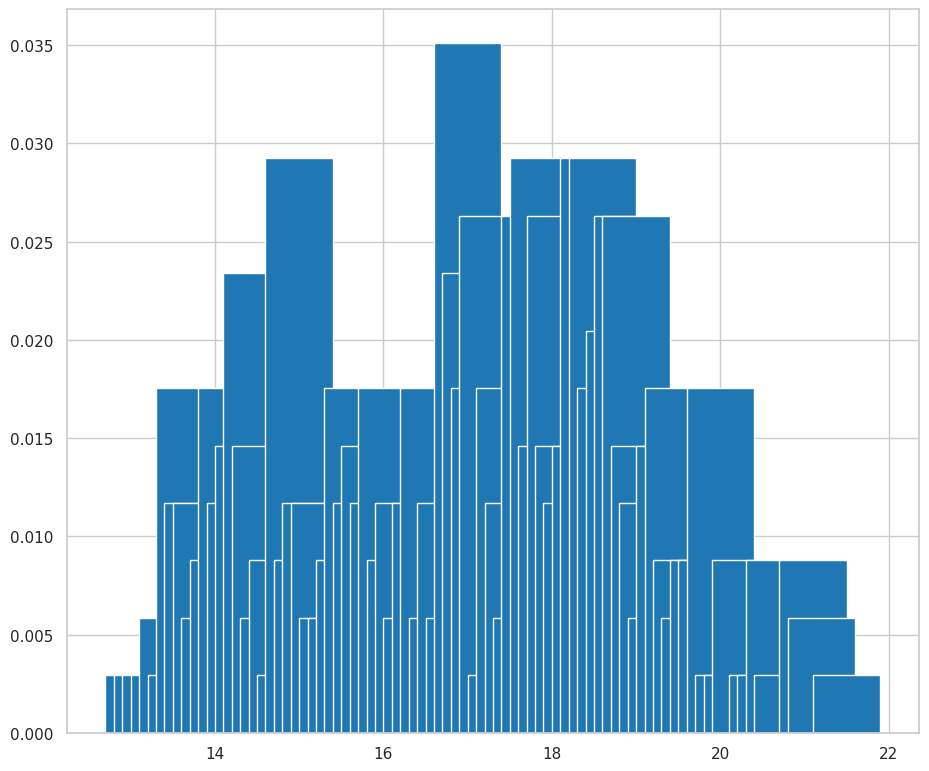

In [6]:
pmf_bill_depth_mm = empiricaldist.Pmf.from_seq(penguins_df.bill_depth_mm,normalize=True)
pmf_bill_depth_mm.bar()

PROBALIDIDAD DE UN DATO EN ESPEFICO

In [7]:
pmf_bill_depth_mm(20)

0.017543859649122806

In [8]:
pmf_bill_depth_mm(penguins_df.bill_depth_mm.mean())

0

## FUNCIÓN DE DISTRIBUCIÓN ACUMULADA(CDFs) es la probabilidad de que en el dataset obtenga un valor especifico o menor a ese valor , por ejemplo un bill_depth 20 o menor a 20

In [10]:
cdf_bill_depth_mm = empiricaldist.Cdf.from_seq(
    penguins_df.bill_depth_mm,
    normalize=True
)

cdf_bill_depth_mm

,
bill_depth_mm,
13.1,0.002924
13.2,0.005848
13.3,0.008772
13.4,0.011696
13.5,0.017544
...,...
20.7,0.979532
20.8,0.982456
21.1,0.991228


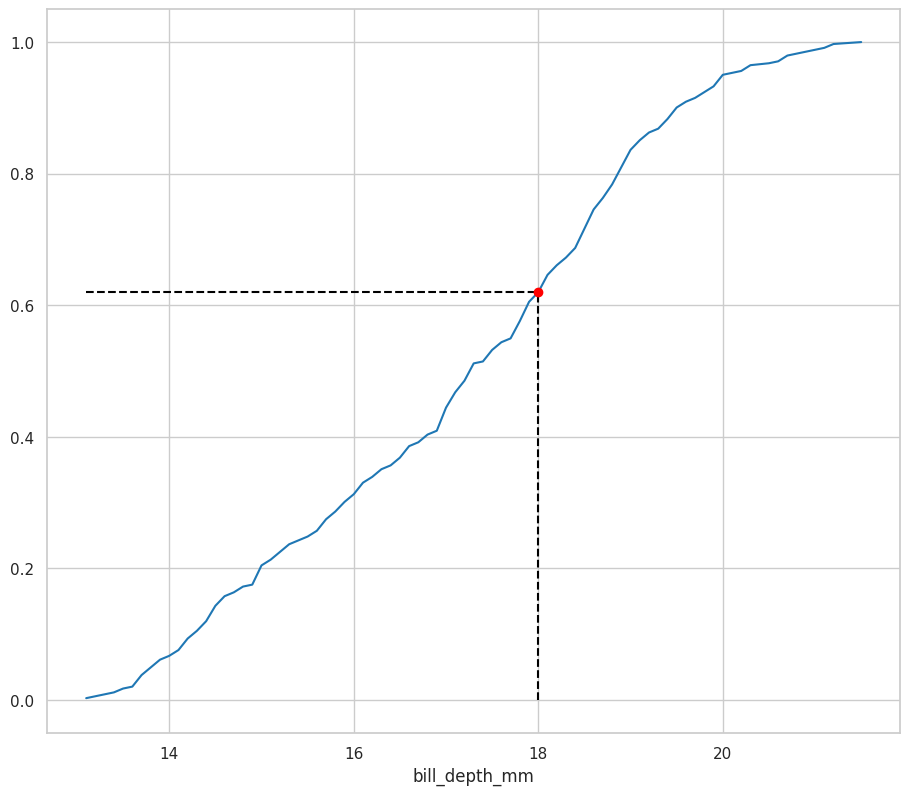

In [17]:
cdf_bill_depth_mm.plot()
q = 18
p = cdf_bill_depth_mm.forward(q)
#print(q,p)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='black',
    linestyle='dashed'
)
plt.hlines(
    y=p,
    xmin=pmf_bill_depth_mm.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)

plt.plot(q,p,'ro')